In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.contrib.tensorboard.plugins import projector
from process_data import process_data

In [2]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import os

In [3]:
VOCAB_SIZE = 1000
BATCH_SIZE = 16
EMBED_SIZE = 50 
SKIP_WINDOW = 1 
NUM_SAMPLED = 64
LEARNING_RATE = 1.0
NUM_TRAIN_STEPS = 10
SKIP_STEP = 200

In [4]:
batch_gen = process_data(VOCAB_SIZE, BATCH_SIZE, SKIP_WINDOW)

Dataset ready


In [5]:
with tf.name_scope('data'):
        center_words = tf.placeholder(tf.int32, shape=[BATCH_SIZE], name='center_words')
        target_words = tf.placeholder(tf.int32, shape=[BATCH_SIZE, 1], name='target_words')

In [6]:
with tf.name_scope('embedding_matrix'):
        embed_matrix = tf.Variable(tf.random_uniform([VOCAB_SIZE, EMBED_SIZE], -1.0, 1.0), 
                            name='embed_matrix')

In [7]:

with tf.name_scope('loss'):
        embed = tf.nn.embedding_lookup(embed_matrix, center_words, name='embed')


        nce_weight = tf.Variable(tf.truncated_normal([VOCAB_SIZE, EMBED_SIZE],
                                                    stddev=1.0 / (EMBED_SIZE ** 0.5)), 
                                                    name='nce_weight')
        nce_bias = tf.Variable(tf.zeros([VOCAB_SIZE]), name='nce_bias')

In [8]:
        
loss = tf.reduce_mean(tf.nn.nce_loss(weights=nce_weight, 
                                            biases=nce_bias, 
                                            labels=target_words, 
                                            inputs=embed, 
                                            num_sampled=NUM_SAMPLED, 
                                            num_classes=VOCAB_SIZE), name='loss')


optimizer = tf.train.GradientDescentOptimizer(LEARNING_RATE).minimize(loss)

In [9]:
    sess=tf.Session()
    sess.run(tf.global_variables_initializer())

    total_loss = 0.0 
    writer = tf.summary.FileWriter('./mygraph/no_frills/', sess.graph)
    for index in range(NUM_TRAIN_STEPS):
        centers, targets = next(batch_gen)
        loss_batch, _ = sess.run([loss, optimizer], 
                                    feed_dict={center_words: centers, target_words: targets})
        total_loss += loss_batch
        if (index + 1) % SKIP_STEP == 0:
            print('Average loss at step {}: {:5.1f}'.format(index, total_loss / SKIP_STEP))
            total_loss = 0.0
        writer.close()
        

In [10]:
from tensorflow.contrib.tensorboard.plugins import projector

In [11]:

final_embed_matrix = sess.run(embed_matrix)


embedding_var = tf.Variable(final_embed_matrix[:50], name='embedding')
sess.run(embedding_var.initializer)
config = projector.ProjectorConfig()
summary_writer = tf.summary.FileWriter('./mygraph/no_frills/')


embedding = config.embeddings.add()
embedding.tensor_name = embedding_var.name


embedding.metadata_path = './mygraph/no_frills/vocab_1000.tsv'


projector.visualize_embeddings(summary_writer, config)


saver_embed = tf.train.Saver([embedding_var])
saver_embed.save(sess, './mygraph/no_frills/skip-gram.ckpt', 1)
writer.close()

In [12]:
filename = "./mygraph/no_frills/vocab_1000.tsv"

In [13]:
vocab = []
with open(filename) as text:
    for eachLine in text:
        vocab.extend(eachLine.strip().split(" "))
#print(len(vocab))

In [15]:
la = np.linalg

In [16]:
U, s, Vh = la.svd(final_embed_matrix, full_matrices=False)

In [17]:

from matplotlib import pyplot as plt

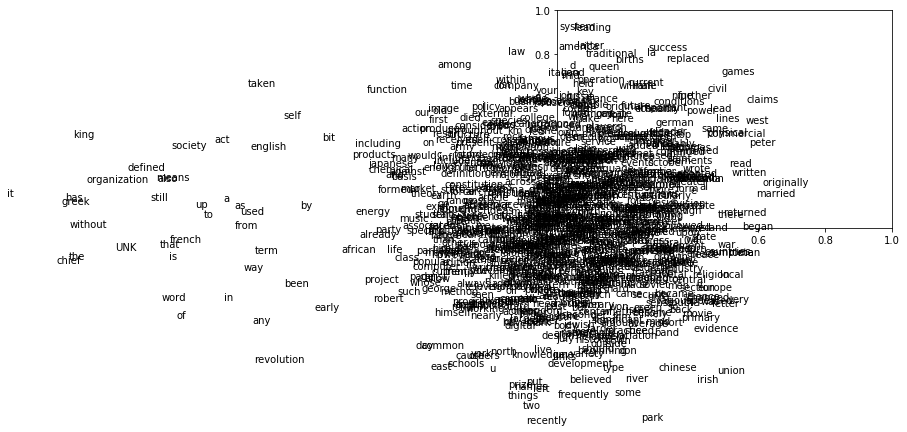

In [18]:
for i in range(len(vocab)):
    plt.text(10*U[i,0],10*U[i,1], vocab[i])

In [25]:
vocab[:50]

['UNK',
 'the',
 'of',
 'and',
 'one',
 'in',
 'a',
 'to',
 'zero',
 'nine',
 'two',
 'is',
 'as',
 'eight',
 'for',
 's',
 'five',
 'three',
 'was',
 'by',
 'that',
 'four',
 'six',
 'seven',
 'with',
 'on',
 'are',
 'it',
 'from',
 'or',
 'his',
 'an',
 'be',
 'this',
 'which',
 'at',
 'he',
 'also',
 'not',
 'have',
 'were',
 'has',
 'but',
 'other',
 'their',
 'its',
 'first',
 'they',
 'some',
 'had']